# Exercicio de Clusterização


Vamos trabalhar com o dataset customers. O conjunto de dados original está [disponível na UCI](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). No nosso dataset dataset foram removidos os atributos 'Channel' e 'Region' para facilitar a análise, pois o foco é verificarmos as seis categorias de produtos comprados pelos clientes, mas fique a vontade para trabalhar com o dado original. Após a remoção das duas variáveis citadas ficamos com o dataset final que será compostos de seis categorias importantes de produtos: Fresh, Milk, Grocery, Frozen, Detergents_Paper e Delicatessen (Perecíveis, Lacticínios, Secos e Molhados, Congelados, Limpeza/Higiene e Padaria/Frios)

#### Import as bibliotecas
Vamos importar algumas bibliotecas para começar!

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import pi
import numpy as np

#### Acesse os dados disponíveis em customers.csv

In [2]:
data = pd.read_csv('customers.csv')
data = data[data.columns.difference(['Channel', 'Region'])]

In [3]:
data.head()

Delicatessen  Detergents_Paper  Fresh  Frozen  Grocery  Milk
0          1338              2674  12669     214     7561  9656
1          1776              3293   7057    1762     9568  9810
2          7844              3516   6353    2405     7684  8808
3          1788               507  13265    6404     4221  1196
4          5185              1777  22615    3915     7198  5410

In [4]:
scaler = MinMaxScaler()
values = scaler.fit_transform(data)

In [5]:
data = pd.DataFrame(values, columns = data.columns)

#### Aplique pré-processamento sobre os dados para criar seu dataset alvo, se você julgar necessário. *Considere remover os outiliers em mais de um atributo*

In [6]:
data.columns

Index(['Delicatessen', 'Detergents_Paper', 'Fresh', 'Frozen', 'Grocery',
       'Milk'],
      dtype='object')

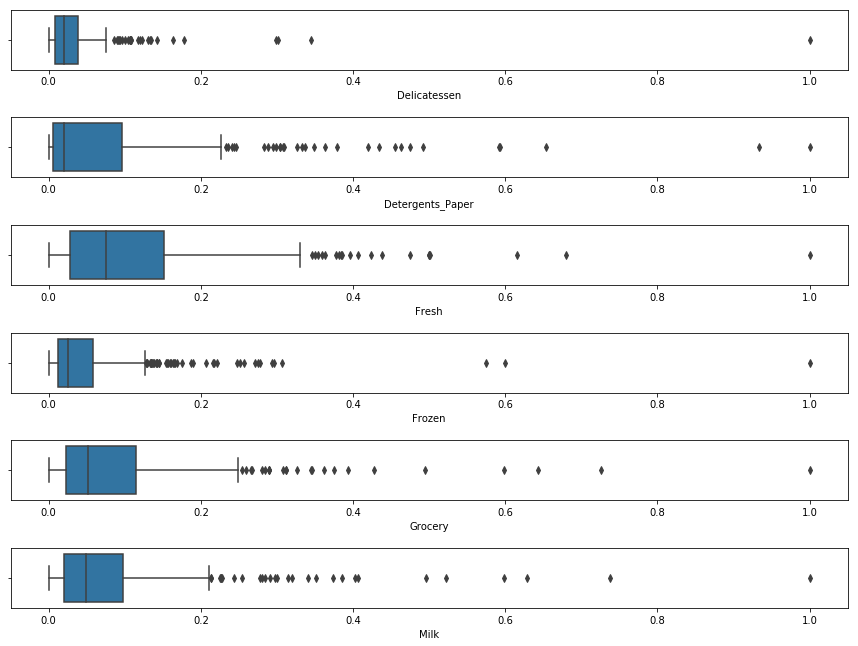

In [7]:
fig, ax = plt.subplots(nrows = 6, figsize = (15, 11))

for i, column in enumerate(data.columns):
    sns.boxplot(x = column, data = data, ax = ax[i])
    
plt.subplots_adjust(hspace=0.8)
plt.show()

In [8]:
data.shape

(440, 6)

In [9]:
for column in data.columns:
    data = data[(data[column] >= (data[column].mean() - 3 * data[column].std())) & (data[column] <= (data[column].mean() + 3 * data[column].std()))]

In [10]:
data.shape

(397, 6)

In [11]:
# to avoid the overwriter file
dataset = data.copy()

#### Aplique o algoritmo [K-means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), sobre o dataset criado. Julgue a necessidade de aplicar PCA ou não. Veja mais em nota, no final do exercício.

In [12]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [13]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [14]:
pd.DataFrame(kmeans.labels_, columns = ['Label'])['Label'].value_counts()

1    298
0     99
Name: Label, dtype: int64

#### Aplique o método da [silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) e verifique a qualidade do cluster gerado

In [15]:
data

Delicatessen  Detergents_Paper     Fresh    Frozen   Grocery      Milk
0        0.027847          0.065427  0.112940  0.003106  0.081464  0.130727
1        0.036984          0.080590  0.062899  0.028548  0.103097  0.132824
2        0.163559          0.086052  0.056622  0.039116  0.082790  0.119181
3        0.037234          0.012346  0.118254  0.104842  0.045464  0.015536
4        0.108093          0.043455  0.201626  0.063934  0.077552  0.072914
5        0.030204          0.043896  0.083907  0.010535  0.055218  0.111706
6        0.011306          0.076842  0.108098  0.007478  0.075148  0.042809
7        0.053463          0.081276  0.067554  0.027020  0.101566  0.066732
8        0.015582          0.041961  0.053144  0.006574  0.066708  0.048922
9        0.043700          0.181805  0.053527  0.018638  0.203477  0.150293
10       0.036316          0.146335  0.029987  0.071905  0.139808  0.072818
11       0.010305          0.013374  0.117193  0.022927  0.048719  0.014556
12       0.061076          0.094993  0.282760  0.004306  0.126691  0.166987
13       0.012495          0.164217  0.189161  0.050457  0.161452  0.083779
14       0.045161          0.123824  0.219799  0.004421  0.130291  0.128127
15       0.008531          0.023540  0.091397  0.006114  0.041152  0.014419
16       0.022466          0.110352  0.009068  0.001791  0.130614  0.119290
17       0.093346          0.008990  0.052368  0.013378  0.031581  0.083085
18       0.066291          0.067705  0.165834  0.035829  0.108820  0.085400
19       0.010388          0.061606  0.069346  0.010584  0.101976  0.033223
20       0.044243          0.055262  0.156427  0.017109  0.049570  0.060782
21       0.011806          0.009112  0.049613  0.055190  0.021633  0.011111
22       0.090342          0.058250  0.278855  0.154214  0.048137  0.025353
24       0.120463          0.109715  0.201912  0.047499  0.148625  0.132361
25       0.001126          0.097982  0.144113  0.002893  0.081831  0.056847
26       0.017313          0.005854  0.088232  0.051377  0.030805  0.012336
27       0.010743          0.002376  0.127269  0.007560  0.032788  0.010185
29       0.017105          0.027043  0.384180  0.019312  0.028089  0.027845
30       0.061744          0.052200  0.167743  0.018457  0.119685  0.048405
31       0.020484          0.020013  0.023264  0.033906  0.033737  0.058331
..            ...               ...       ...       ...       ...       ...
408      0.007113          0.066799  0.073599  0.026642  0.069026  0.052081
409      0.107092          0.051930  0.077621  0.038196  0.065717  0.048732
410      0.039403          0.045488  0.059118  0.022418  0.049150  0.027790
411      0.090989          0.005683  0.018930  0.024818  0.035332  0.044034
412      0.001231          0.072678  0.000838  0.001200  0.133621  0.048337
414      0.005987          0.027729  0.053198  0.092926  0.036798  0.026347
415      0.039028          0.086640  0.069899  0.027382  0.092146  0.081573
416      0.020651          0.164732  0.039109  0.013526  0.117540  0.148210
417      0.022111          0.085293  0.045137  0.005572  0.119124  0.074126
418      0.016124          0.165025  0.005858  0.001775  0.200686  0.114905
419      0.031665          0.038629  0.078985  0.009993  0.023928  0.050760
420      0.028995          0.166936  0.039706  0.000000  0.142535  0.070953
421      0.037151          0.083578  0.152120  0.016534  0.097546  0.065248
422      0.025344          0.023148  0.235376  0.013231  0.044936  0.018000
423      0.013872          0.044092  0.156597  0.016994  0.050163  0.049440
424      0.005131          0.078630  0.151380  0.013954  0.131811  0.038520
425      0.039278          0.002572  0.100225  0.251841  0.027916  0.032038
426      0.039445          0.124339  0.117086  0.051213  0.154273  0.126520
427      0.024197          0.010680  0.276501  0.247469  0.058484  0.226461
428      0.006550          0.020748  0.027143  0.035714  0.052890  0.080539
429      0.052107          0.001984  0.076720  0.0003

In [16]:
from sklearn.metrics import silhouette_score
preds = kmeans.predict(data)
silhouette_score(data, preds)

0.3842583545813093

In [18]:
data.head()

Delicatessen  Detergents_Paper     Fresh    Frozen   Grocery      Milk
0      0.027847          0.065427  0.112940  0.003106  0.081464  0.130727
1      0.036984          0.080590  0.062899  0.028548  0.103097  0.132824
2      0.163559          0.086052  0.056622  0.039116  0.082790  0.119181
3      0.037234          0.012346  0.118254  0.104842  0.045464  0.015536
4      0.108093          0.043455  0.201626  0.063934  0.077552  0.072914

#### Analise os resultados, utilizando as seguintes métricas de avaliação para clusters[(completeness e homogeneity)](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure) (leia sobre elas na documentação).

 #### Varie o número de K, hiper parâmetro do K-Means e identifique o melhor valor considerando o método da silhueta.

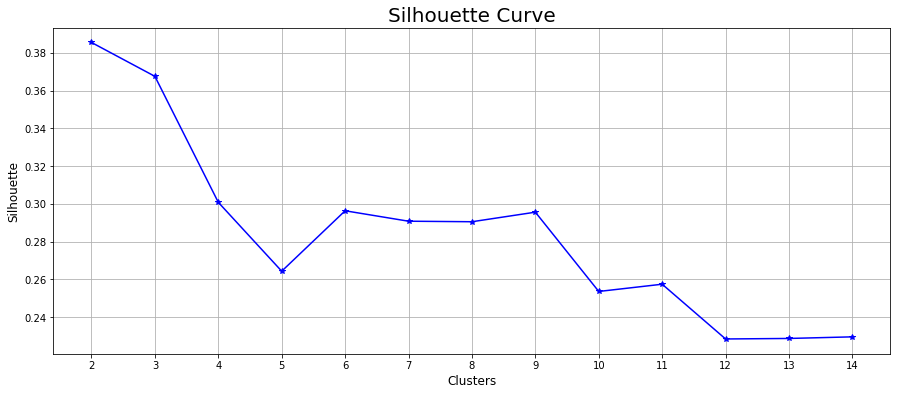

In [438]:
sil = []
for k in range(2, 15):
    kmeans_ = KMeans(n_clusters=k, random_state=10)
    kmeans_.fit(data)
    sil.append(silhouette_score(data, kmeans_.predict(data)))

cluster = np.arange(2, 15)
sil = np.array(sil)

plt.figure(figsize = (15, 6))
plt.plot(cluster, sil, 'b*-')

plt.title("Silhouette Curve", fontsize = 20)
plt.xlabel("Clusters", fontsize = 12)
plt.ylabel("Silhouette", fontsize = 12)

plt.xticks(cluster)
plt.grid()

plt.show()

 #### Varie o número de K, hiper parâmetro do K-Means e identifique o melhor valor considerando o método da curva do cotovelo, [veja este exemplo](https://pythonprogramminglanguage.com/kmeans-elbow-method/). O resultado obtido foi igual ao aplicado na questão anterior?

In [439]:
from scipy.spatial.distance import cdist

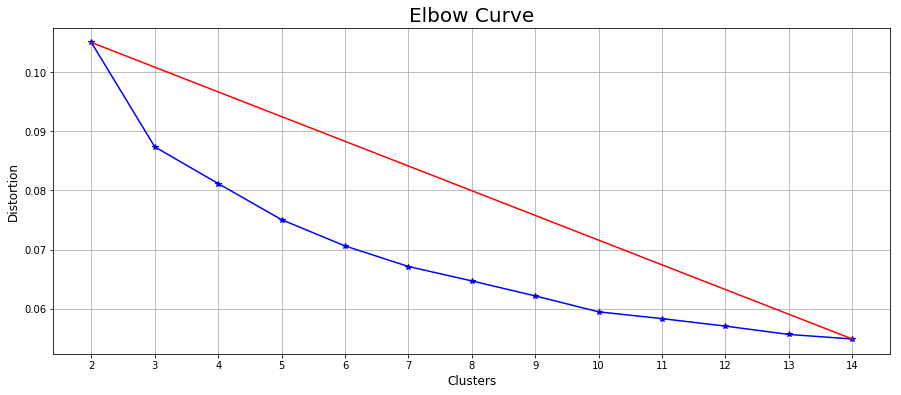

In [440]:
distortions = []
for k in range(2, 15):
    kmeans_ = KMeans(n_clusters=k, random_state=10)
    kmeans_.fit(data)
    distortions.append(
        sum(np.min(
                    cdist(data, kmeans_.cluster_centers_, 'euclidean'), axis=1)
                           ) 
                / data.shape[0]
    )
    
cluster = np.arange(2, 15)
distortions = np.array(distortions)

plt.figure(figsize = (15, 6))
plt.plot(cluster, distortions, 'b*-')
plt.plot(np.array([cluster[0], cluster[-1]]), np.array([distortions[0], distortions[-1]]), color = 'r')

plt.title("Elbow Curve", fontsize = 20)
plt.xlabel("Clusters", fontsize = 12)
plt.ylabel("Distortion", fontsize = 12)
plt.xticks(cluster)
plt.grid()

plt.show()

#### Recupere os centroídes e faça um radar chart considerando os centroídes, [veja este exemplo](https://python-graph-gallery.com/391-radar-chart-with-several-individuals/). *P.S.: Para recuperar os centroídes use kmeans.cluster_centers_*

In [441]:
df = pd.DataFrame(kmeans.cluster_centers_, columns = ['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6'])

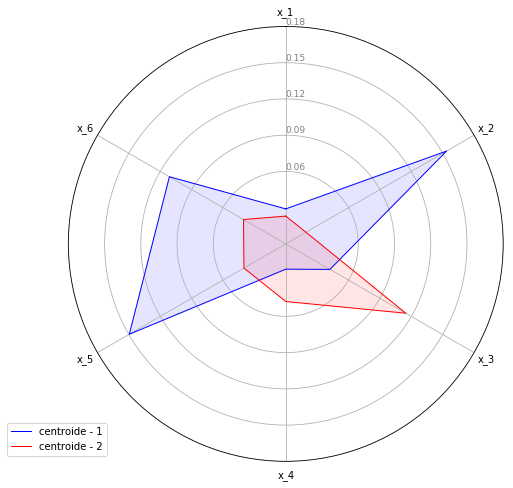

In [442]:
df = pd.DataFrame(kmeans.cluster_centers_, columns = ['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6'])
plt.figure(figsize = (20, 8))

# number of variable
categories=df.columns.tolist()
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.06, 0.09, 0.12, 0.15, 0.18], ["0.06","0.09", "0.12","0.15", "0.18"], color="grey", size=9)
plt.ylim(0,0.18)

## Step 2
for r, color in zip(np.arange(df.shape[0]), ['b', 'r', 'y', 'k']):
    values = df.loc[r].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label= f"centroide - {r + 1}", color =color)
    ax.fill(angles, values, color, alpha=0.1)
    

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

#### Os resultados parecem favoráveis os centroídes são de fato distintos? Como você interpreta os dados com base nesta informação?*

#### Recupere as amostras de cada cluster e faça um parallel coordinates, [veja este exemplo](https://python-graph-gallery.com/150-parallel-plot-with-pandas/) ou [este](https://jovianlin.io/data-visualization-seaborn-part-2/). Os resultados parecem favoráveis e os centroídes são de fato distintos? Como você interpreta os dados com base nesta informação?

In [443]:
dataset['Cluster'] = kmeans.predict(data)

C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


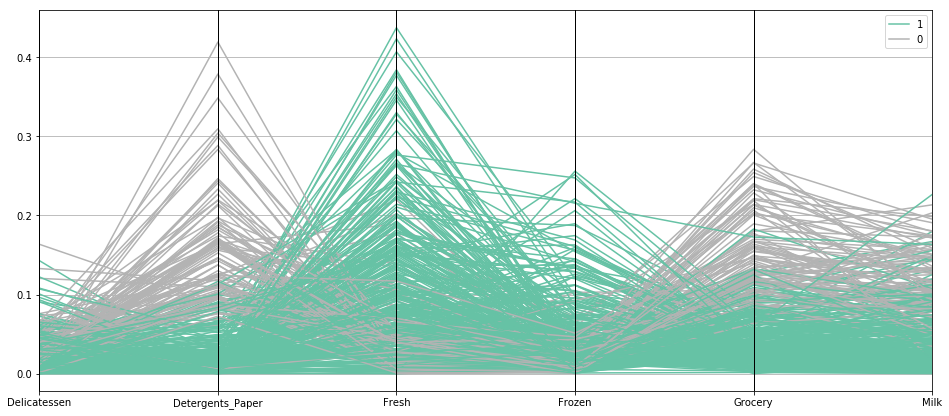

In [444]:
plt.figure(figsize = (16, 7))
# Make the plot
parallel_coordinates(dataset, 'Cluster', colormap=plt.get_cmap("Set2"))
plt.show()


#### Crie alguns gráficos, scatterplot do cluster, mostrando os dados definidos pelo cluster. Que tal tentar marcar os centroídes neste gráfico? *P.S.: Se você criou o PCA construa o gráfico considerando variações das 4 primeiras componentes*

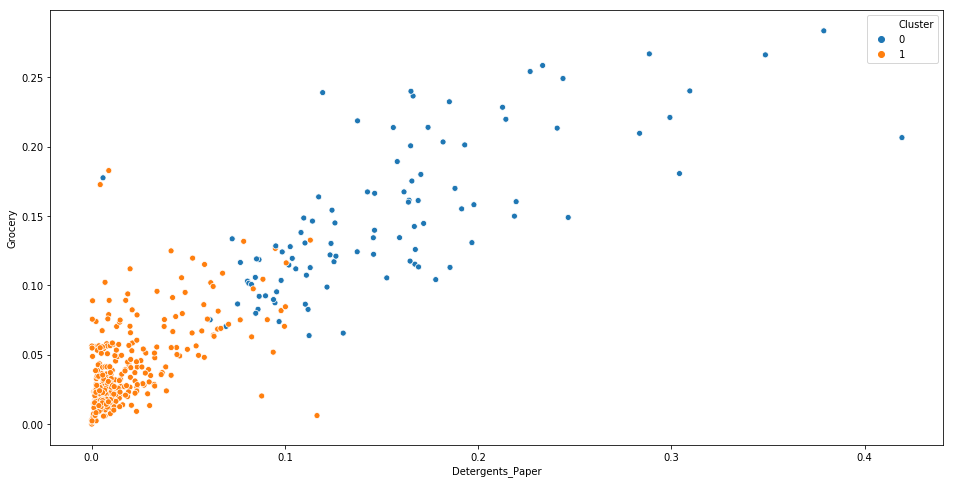

In [431]:
sns.scatterplot(x = 'Detergents_Paper', y = 'Grocery', hue = 'Cluster', data = dataset, ax = plt.subplots(figsize = (16, 8))[1])

#### Refaça todos passos, quando aplicáveis, considerando o algoritmo [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), [veja este exemplo](http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html), considerando variações nos hiperparâmetros, numMinPoints e eps.

# Nota

#### É muito comum aplicar PCA para reduzir a dimensionalidade dos dados, principalmente quando trabalhamos com aprendizagem não supervisionada. Para isso é necessário interpretar o quanto as componentes explicam a variação nos dados, por exemplo, qual o número de componentes utilizar e o cumulativo total que representa as componentes sobre os dados. Também é preciso explicar como as componenentes se relaciona as variáveis originais do dado, considerando todas as amostras ou parte delas. Nesses dois sites há dicas de como compreender melhor essa interpretação [dica_1](https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/key-results/) e [dica_2](https://newonlinecourses.science.psu.edu/stat505/node/54/)